In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
file="weight evolution.csv"
data=pd.read_csv(file,sep=';')
data.dtypes

Date      object
weight    object
dtype: object

In [3]:
data.head()
print(data.columns)

Index(['Date', 'weight'], dtype='object')


In [4]:
data=pd.read_csv(file,sep=';')
data.head()

,Date,weight
0,25/05/2019,90
1,26/05/2019,90
2,27/05/2019,"89,8"
3,28/05/2019,89
4,29/05/2019,90


In [5]:
formateador=lambda fecha: pd.datetime.strptime(fecha,'%d/%m/%Y')
data=pd.read_csv(file,sep=';',parse_dates=['Date'],date_parser=formateador,index_col='Date',decimal=',')
print(data.dtypes)
data.head()

weight    float64
dtype: object


,weight
Date,
2019-05-25,90.0
2019-05-26,90.0
2019-05-27,89.8
2019-05-28,89.0
2019-05-29,90.0


In [6]:
data=data.dropna()

Code	Meaning

%a	Weekday as Sun, Mon

%A	Weekday as full name as Sunday, Monday

%w	Weekday as decimal no as 0,1,2...

%d	Day of month as 01,02

%b	Months as Jan, Feb

%B	Months as January, February

%m	Months as 01,02

%y	Year without century as 11,12,13

%Y	Year with century 2011,2012

%H	24 Hours clock from 00 to 23

%I	12 Hours clock from 01 to 12

%p	AM, PM

%M	Minutes from 00 to 59

%S	Seconds from 00 to 59

%f	Microseconds 6 decimal numbers

In [7]:
#data=data.dropna()
ts=data['weight']
print(len(ts))
ts=ts.iloc[600:]

1464


In [8]:
ts.head()

Date
2017-07-16    90.6
2017-07-17    90.6
2017-07-18    88.4
2017-07-19    90.4
2017-07-20    90.4
Name: weight, dtype: float64

[80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99]


C:\Users\juanh\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


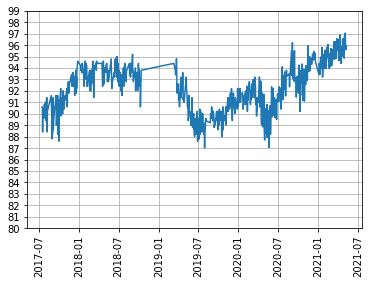

In [9]:
ticks=np.arange(80,100,1)
print(ticks)
plt.plot(ts)
plt.grid()
plt.xticks(rotation='vertical')
plt.yticks(ticks=ticks)
plt.show()

In [98]:
def stationality_test(ts):
    mean_evolution=ts.rolling(window=12).mean()
    std_evolution=ts.rolling(window=12).std()
    return [mean_evolution,std_evolution]

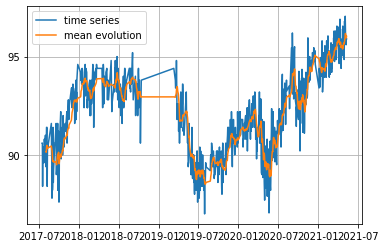

In [99]:
ticks=np.arange(80,100,5)
out=stationality_test(ts)
mu=out[0]
sigma=out[1]
plt.yticks(ticks=ticks)
plt.plot(ts,label='time series')
plt.plot(mu,label='mean evolution')
#plt.plot(sigma,label='std evolution')
plt.grid()
plt.legend()
plt.show()

In [100]:
output[4]

{'1%': -3.438003436504483,
 '5%': -2.864918407242872,
 '10%': -2.5685689238190808}

In [101]:
import statsmodels.tsa.stattools as tsa
output = tsa.adfuller(ts, autolag='AIC')
print(output)
dfoutput = pd.Series(output[0:4], index=['Test Statistic',
                                             'p-value',
                                             '#Lags Used',
                                             'Number of Observations Used'])
for key,output in output[4].items:
    dfoutput[key]=output
dfoutput

(-1.4805832166685822, 0.5430937476150002, 6, 857, {'1%': -3.438003436504483, '5%': -2.864918407242872, '10%': -2.5685689238190808}, 2039.790763286487)


TypeError: 'builtin_function_or_method' object is not iterable

In [102]:
data=pd.read_excel('all-euro-data-2020-2021.xlsx')

In [80]:
data.head()
feats=['HomeTeam','FTHG']
df=data[feats]
df.head(10)

,HomeTeam,FTHG
0,Fulham,0
1,Crystal Palace,1
2,Liverpool,4
3,West Ham,0
4,West Brom,0
5,Tottenham,0
6,Brighton,1
7,Sheffield United,0
8,Everton,5
9,Leeds,4


In [81]:
team='Sheffield United'
serie=df[df['HomeTeam']==team]
serie=serie['FTHG']

In [82]:
tsa.adfuller(serie)

(-3.5370380684793803,
 0.007085296355589516,
 0,
 14,
 {'1%': -4.01203360058309,
  '5%': -3.1041838775510207,
  '10%': -2.6909873469387753},
 23.57614626730394)

In [104]:
ts

Date
2017-07-16    90.60
2017-07-17    90.60
2017-07-18    88.40
2017-07-19    90.40
2017-07-20    90.40
2017-07-24    89.60
2017-07-25    90.20
2017-07-26    90.80
2017-07-28    90.40
2017-07-31    91.00
2017-08-01    90.20
2017-08-02    89.40
2017-08-03    90.20
2017-08-04    90.80
2017-08-05    91.40
2017-08-07    91.40
2017-08-08    88.40
2017-08-09    90.00
2017-08-10    90.60
2017-08-11    90.40
2017-08-27    91.60
2017-08-28    90.20
2017-08-29    89.80
2017-08-30    87.80
2017-08-31    89.40
2017-09-01    88.20
2017-09-02    88.40
2017-09-04    91.40
2017-09-05    88.60
2017-09-06    89.20
              ...  
2021-04-10    96.90
2021-04-11    95.60
2021-04-12    96.40
2021-04-13    95.10
2021-04-14    95.65
2021-04-15    94.40
2021-04-16    95.35
2021-04-17    95.05
2021-04-18    95.05
2021-04-19    95.65
2021-04-20    95.90
2021-04-21    95.05
2021-04-22    95.40
2021-04-23    96.55
2021-04-24    96.40
2021-04-25    96.30
2021-04-26    96.50
2021-04-27    94.95
2021-04-28    9

In [114]:
trend = ts.ewm(halflife=12).mean()
diff=ts-trend

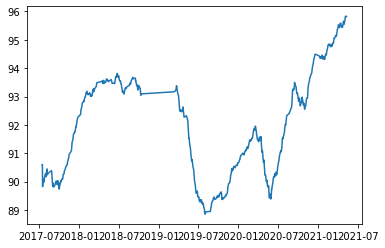

In [117]:
plt.plot(trend)

In [149]:
serie=(np.random.randint(1,10,864))
index=ts.index
df=pd.DataFrame(serie,index=index,columns=['serie'])
decompose(df,freq=100)

In [163]:
ts['time']=ts.index
ts.dtypes

dtype('O')

In [158]:
from statsmodels.tsa.seasonal import seasonal_decompose as decompose
freq = ts.index.inferred_freq
print(freq)
out=decompose(ts,freq)
trend=out.trend
season=out.seasonal
residuo=out.resid


None


AttributeError: 'NoneType' object has no attribute 'startswith'

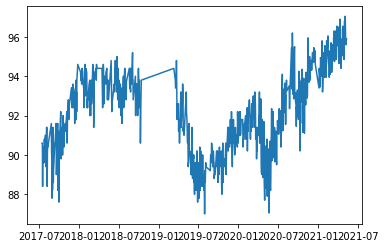

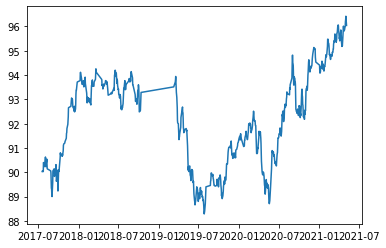

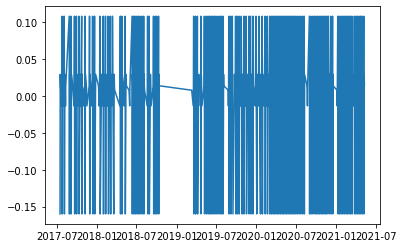

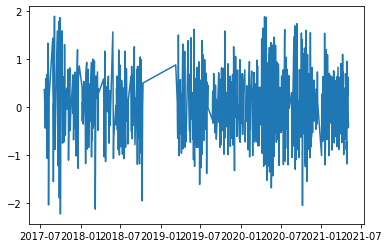

In [151]:
plt.plot(ts)
plt.show()
plt.plot(trend)
plt.show()
plt.plot(season)
plt.show()
plt.plot(residuo)
plt.show()

# ARIMA

In [40]:
diff=ts-ts.rolling(window=7).mean()

In [41]:

diff=diff.dropna()

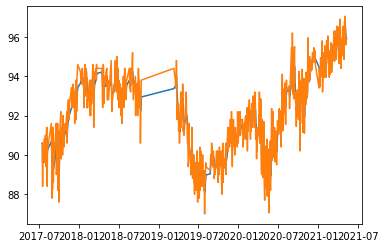

In [60]:
plt.plot(ts.ewm(halflife=2).mean())
plt.plot(ts)
plt.show()
diff=ts-ts.ewm(halflife=2).mean()

In [85]:
trend=ts.ewm(halflife=7).mean()
residuo=ts-trend

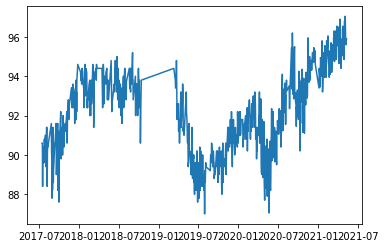

C:\Users\juanh\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\juanh\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [107]:
from statsmodels.tsa.arima_model import ARIMA 
plt.plot(ts)
plt.show()
model=ARIMA(ts,order=(5,1,5))

In [108]:
results=model.fit()

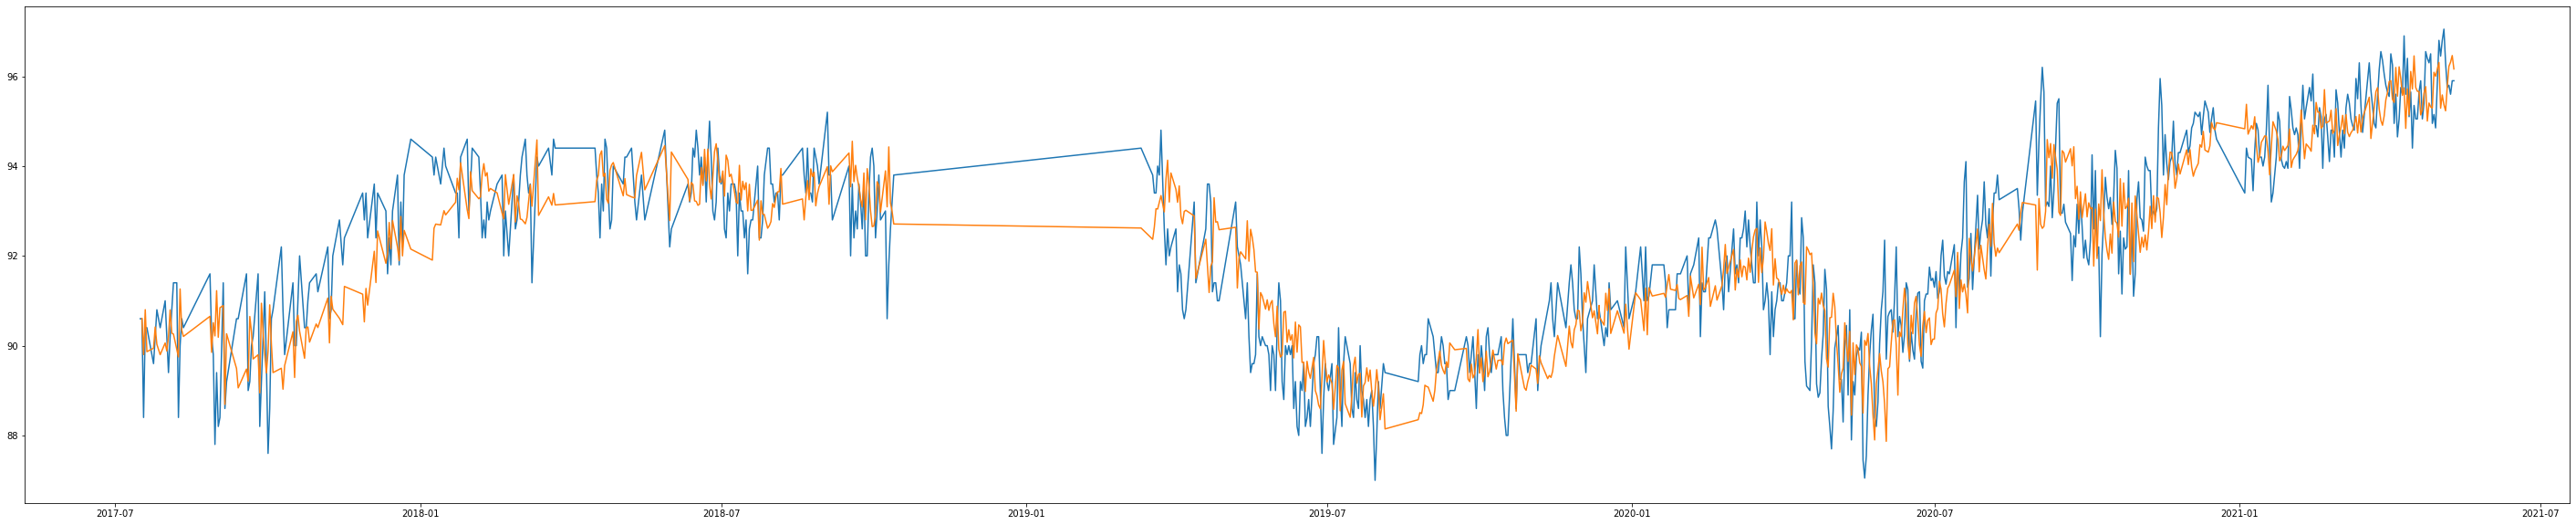

0.7959387437883112


In [109]:
plt.figure(figsize=(50,10))
plt.plot(ts)
plt.plot(results.fittedvalues+trend)

plt.show()
errors=(diff-results.fittedvalues)
errors=pd.DataFrame(errors)
errors['squared']=errors
errors['squared']=errors['squared'].apply(lambda x: x**2)
error=errors['squared'].mean()
error=np.sqrt(error)
print(error)

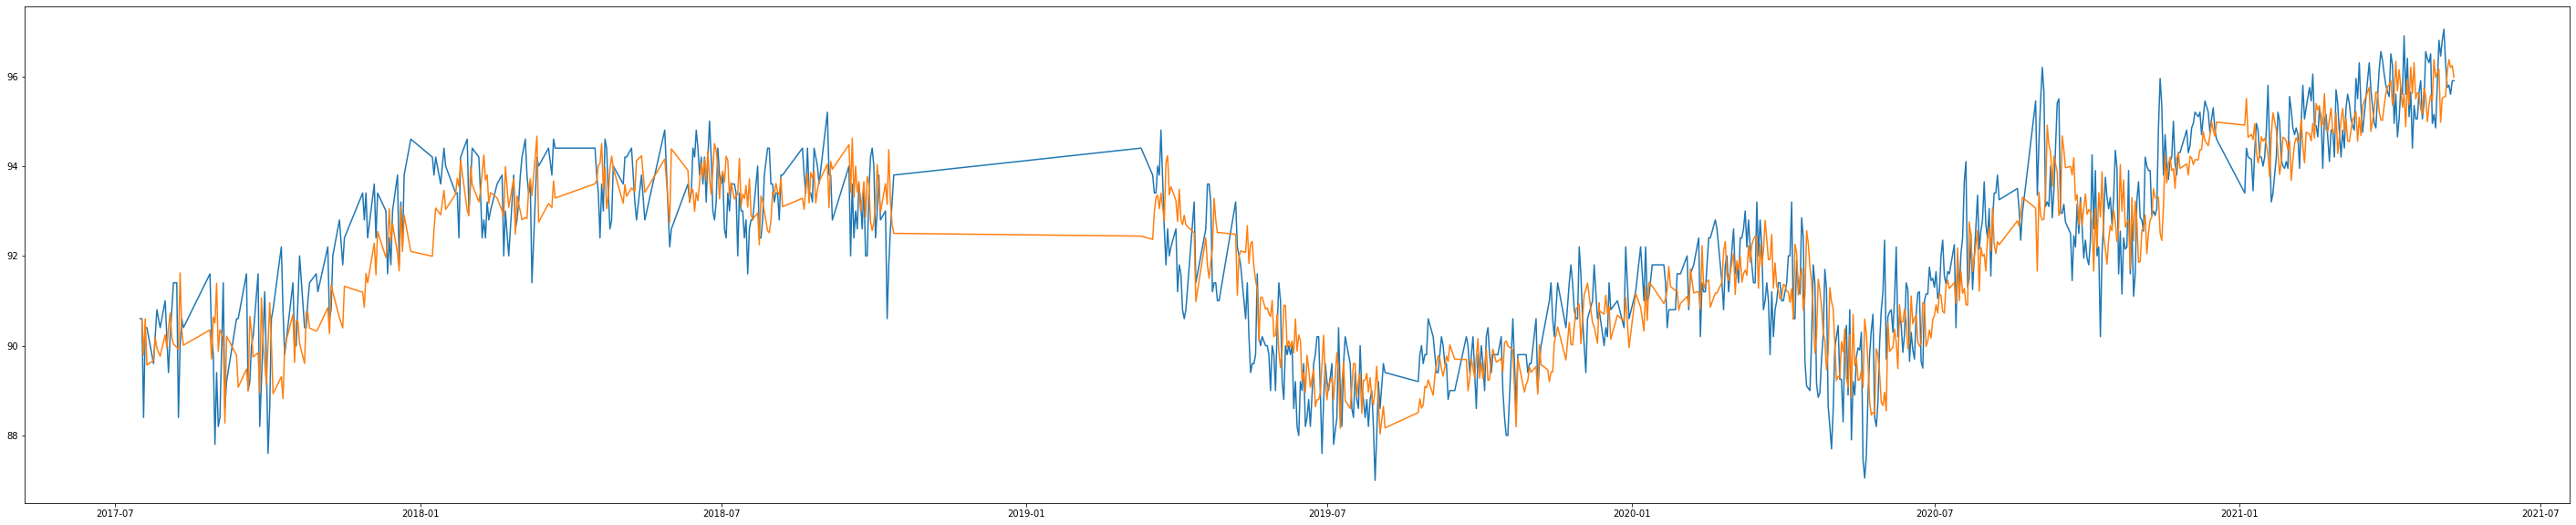

0.8408331068548623


In [92]:
prediction=results.fittedvalues+trend

plt.figure(figsize=(50,10))
plt.plot(ts)
plt.plot(prediction)

plt.show()
errors=(diff-results.fittedvalues)
errors=pd.DataFrame(errors)
errors['squared']=errors
errors['squared']=errors['squared'].apply(lambda x: x**2)
error=errors['squared'].mean()
error=np.sqrt(error)
print(error)

In [71]:
results.fittedvalues.values

array([ 3.50174764e-05, -1.68577411e-01, -2.15617840e-02, -9.06721014e-02,
        2.80870783e-01,  6.28994462e-01,  2.14640361e-01, -1.43249212e-01,
       -4.52656904e-01, -3.65947559e-01,  1.19103388e+00,  3.37762046e-01,
       -5.84015909e-02,  5.02215275e-02, -5.86284865e-01,  1.10352615e-01,
        2.97532487e-01,  1.45995301e+00,  4.93334111e-01,  8.73007789e-01,
        5.95455715e-01, -1.34007673e+00,  9.18718283e-02, -1.51103079e-01,
       -8.19043790e-01, -7.53829346e-01, -1.03623901e+00,  6.49307654e-01,
        4.99542494e-01,  6.75170908e-02, -1.44186364e-02, -8.13046885e-01,
        1.05551880e+00,  3.96318476e-01, -2.38796298e-01, -7.46708586e-01,
        2.03065884e-01,  1.34789746e+00,  5.21431442e-01, -6.53484289e-01,
       -7.40273130e-01, -1.43341125e+00, -6.22114121e-01,  1.48708372e-01,
       -4.57295870e-01,  5.02029265e-01,  5.53103482e-01, -8.86353782e-02,
       -8.18896845e-01,  1.14854515e-01,  2.80302073e-01, -1.41988175e-01,
       -3.16096770e-01, -

In [70]:
valores=pd.DataFrame(diff.values,columns=['y'])
valores['prediction']=results.fittedvalues.values
valores.head()

ValueError: Length of values does not match length of index

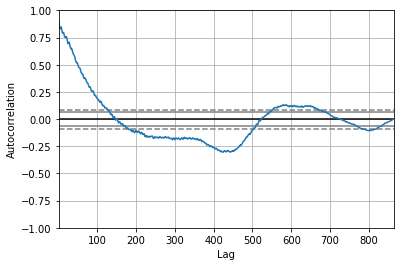

In [111]:
from pandas.plotting import autocorrelation_plot as corr

corr(ts)
plt.show()


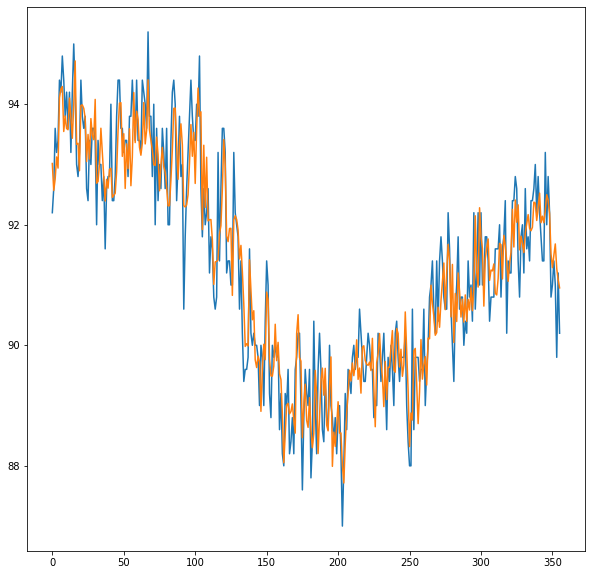

In [145]:
lag=150
x=[]
y=[]
for k in range(0,len(ts)):
    if k>lag:
        
        x.append(ts.iloc[k-lag:k].ravel())
        y.append(ts.iloc[k])

data=pd.DataFrame(x,index=y)


data_tr=data.sample(frac=0.8)
data_test=data[~data.index.isin(data_tr.index)]
particion=round(1/2*len(data),0)
particion=int(particion)
data_tr=data.iloc[:particion]
data_test=data.iloc[:particion]
from sklearn.linear_model import LinearRegression as linear

model=linear()
model.fit(data_tr,data_tr.index)
predictions=model.predict(data_test)
plt.figure(figsize=(10,10))
plt.plot(data_test.index)
plt.plot(predictions)
plt.show()





In [131]:
print(x)

[array([], dtype=float64), array([], dtype=float64), array([], dtype=float64), array([], dtype=float64), array([], dtype=float64), array([], dtype=float64), array([], dtype=float64), array([], dtype=float64), array([], dtype=float64), array([], dtype=float64), array([], dtype=float64), array([], dtype=float64), array([], dtype=float64), array([], dtype=float64), array([], dtype=float64), array([], dtype=float64), array([], dtype=float64), array([], dtype=float64), array([], dtype=float64), array([], dtype=float64), array([], dtype=float64), array([], dtype=float64), array([], dtype=float64), array([], dtype=float64), array([], dtype=float64), array([], dtype=float64), array([], dtype=float64), array([], dtype=float64), array([], dtype=float64), array([], dtype=float64), array([], dtype=float64), array([], dtype=float64), array([], dtype=float64), array([], dtype=float64), array([], dtype=float64), array([], dtype=float64), array([], dtype=float64), array([], dtype=float64), array([], d